In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
data = "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

In [5]:
corpus = data.lower().split("\n")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [6]:
input_sequences = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [8]:
# Pad Sequences
max_sequence_len = max([
    len(x) for x in input_sequences
])

input_sequences = np.array(
    pad_sequences(
        input_sequences,
        maxlen = max_sequence_len,
        padding = 'pre'
    )
)

In [9]:
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

In [10]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [11]:
print(xs[6])
print(ys[6])

[ 0  0  0  4  2 66  8 67 68 69]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  4  2 66  8 67 68]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [17]:
# Printing all Sequences
for i in range(64):
    print(xs[i])
    print("\n")

[0 0 0 0 0 0 0 0 0 4]


[0 0 0 0 0 0 0 0 4 2]


[ 0  0  0  0  0  0  0  4  2 66]


[ 0  0  0  0  0  0  4  2 66  8]


[ 0  0  0  0  0  4  2 66  8 67]


[ 0  0  0  0  4  2 66  8 67 68]


[ 0  0  0  4  2 66  8 67 68 69]


[ 0  0  0  0  0  0  0  0  0 71]


[ 0  0  0  0  0  0  0  0 71 40]


[ 0  0  0  0  0  0  0 71 40 20]


[ 0  0  0  0  0  0 71 40 20 21]


[ 0  0  0  0  0 71 40 20 21 72]


[ 0  0  0  0 71 40 20 21 72  3]


[ 0  0  0  0  0  0  0  0  0 16]


[ 0  0  0  0  0  0  0  0 16 74]


[ 0  0  0  0  0  0  0 16 74 75]


[ 0  0  0  0  0  0 16 74 75  1]


[ 0  0  0  0  0 16 74 75  1 76]


[ 0  0  0  0 16 74 75  1 76 33]


[ 0  0  0 16 74 75  1 76 33  3]


[ 0  0 16 74 75  1 76 33  3 77]


[ 0  0  0  0  0  0  0  0  0 41]


[ 0  0  0  0  0  0  0  0 41 33]


[ 0  0  0  0  0  0  0 41 33  3]


[ 0  0  0  0  0  0 41 33  3 78]


[ 0  0  0  0  0 41 33  3 78  1]


[ 0  0  0  0 41 33  3 78  1 79]


[ 0  0  0 41 33  3 78  1 79 80]


[ 0  0 41 33  3 78  1 79 80  8]


[ 0  0  0  0  0  0  0  0  0 21]




In [20]:
model = Sequential()
model.add(
    Embedding(
        total_words,
        64,
        input_length = max_sequence_len-1
))
model.add(Bidirectional(LSTM(20)))
model.add(Dense( total_words, activation = 'softmax' ))

In [21]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [22]:
history = model.fit(
    xs, ys, epochs = 500, verbose = 1
)

Epoch 1/500
15/15 [==============================] - 2s 4ms/step - loss: 5.5704 - accuracy: 0.0248
Epoch 2/500
15/15 [==============================] - 0s 5ms/step - loss: 5.5508 - accuracy: 0.0506
Epoch 3/500
15/15 [==============================] - 0s 5ms/step - loss: 5.5046 - accuracy: 0.0503
Epoch 4/500
15/15 [==============================] - 0s 5ms/step - loss: 5.3648 - accuracy: 0.0506
Epoch 5/500
15/15 [==============================] - 0s 5ms/step - loss: 5.1441 - accuracy: 0.0349
Epoch 6/500
15/15 [==============================] - 0s 5ms/step - loss: 5.0089 - accuracy: 0.0504
Epoch 7/500
15/15 [==============================] - 0s 5ms/step - loss: 5.0551 - accuracy: 0.0559
Epoch 8/500
15/15 [==============================] - 0s 5ms/step - loss: 4.9397 - accuracy: 0.0520
Epoch 9/500
15/15 [==============================] - 0s 5ms/step - loss: 4.9781 - accuracy: 0.0498
Epoch 10/500
15/15 [==============================] - 0s 5ms/step - loss: 4.9475 - accuracy: 0.0540
Epoch 11/

15/15 [==============================] - 0s 5ms/step - loss: 2.1183 - accuracy: 0.6299
Epoch 84/500
15/15 [==============================] - 0s 5ms/step - loss: 2.1592 - accuracy: 0.6147
Epoch 85/500
15/15 [==============================] - 0s 5ms/step - loss: 2.1474 - accuracy: 0.6246
Epoch 86/500
15/15 [==============================] - 0s 5ms/step - loss: 2.1753 - accuracy: 0.5949
Epoch 87/500
15/15 [==============================] - 0s 5ms/step - loss: 2.1221 - accuracy: 0.6238
Epoch 88/500
15/15 [==============================] - 0s 5ms/step - loss: 2.0904 - accuracy: 0.6041
Epoch 89/500
15/15 [==============================] - 0s 5ms/step - loss: 2.0101 - accuracy: 0.6639
Epoch 90/500
15/15 [==============================] - 0s 5ms/step - loss: 2.0505 - accuracy: 0.6513
Epoch 91/500
15/15 [==============================] - 0s 5ms/step - loss: 2.0319 - accuracy: 0.6469
Epoch 92/500
15/15 [==============================] - 0s 5ms/step - loss: 1.9685 - accuracy: 0.6641
Epoch 93/500


15/15 [==============================] - 0s 5ms/step - loss: 0.8709 - accuracy: 0.8818
Epoch 165/500
15/15 [==============================] - 0s 5ms/step - loss: 0.8881 - accuracy: 0.8684
Epoch 166/500
15/15 [==============================] - 0s 5ms/step - loss: 0.8646 - accuracy: 0.8873
Epoch 167/500
15/15 [==============================] - 0s 5ms/step - loss: 0.8970 - accuracy: 0.8759
Epoch 168/500
15/15 [==============================] - 0s 5ms/step - loss: 0.8689 - accuracy: 0.8788
Epoch 169/500
15/15 [==============================] - 0s 5ms/step - loss: 0.8637 - accuracy: 0.8742
Epoch 170/500
15/15 [==============================] - 0s 5ms/step - loss: 0.8398 - accuracy: 0.8789
Epoch 171/500
15/15 [==============================] - 0s 5ms/step - loss: 0.8474 - accuracy: 0.8858
Epoch 172/500
15/15 [==============================] - 0s 5ms/step - loss: 0.7984 - accuracy: 0.9065
Epoch 173/500
15/15 [==============================] - 0s 5ms/step - loss: 0.8149 - accuracy: 0.8956
Epoc

15/15 [==============================] - 0s 5ms/step - loss: 0.4034 - accuracy: 0.9489
Epoch 246/500
15/15 [==============================] - 0s 5ms/step - loss: 0.4181 - accuracy: 0.9374
Epoch 247/500
15/15 [==============================] - 0s 5ms/step - loss: 0.4150 - accuracy: 0.9447
Epoch 248/500
15/15 [==============================] - 0s 5ms/step - loss: 0.4087 - accuracy: 0.9335
Epoch 249/500
15/15 [==============================] - 0s 5ms/step - loss: 0.4184 - accuracy: 0.9353
Epoch 250/500
15/15 [==============================] - 0s 5ms/step - loss: 0.4016 - accuracy: 0.9491
Epoch 251/500
15/15 [==============================] - 0s 5ms/step - loss: 0.4206 - accuracy: 0.9304
Epoch 252/500
15/15 [==============================] - 0s 5ms/step - loss: 0.4354 - accuracy: 0.9352
Epoch 253/500
15/15 [==============================] - 0s 5ms/step - loss: 0.4165 - accuracy: 0.9375
Epoch 254/500
15/15 [==============================] - 0s 5ms/step - loss: 0.4234 - accuracy: 0.9344
Epoc

15/15 [==============================] - 0s 5ms/step - loss: 0.2299 - accuracy: 0.9492
Epoch 327/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2380 - accuracy: 0.9454
Epoch 328/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2301 - accuracy: 0.9477
Epoch 329/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2184 - accuracy: 0.9620
Epoch 330/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2524 - accuracy: 0.9463
Epoch 331/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2344 - accuracy: 0.9530
Epoch 332/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2395 - accuracy: 0.9482
Epoch 333/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2223 - accuracy: 0.9507
Epoch 334/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2255 - accuracy: 0.9544
Epoch 335/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2175 - accuracy: 0.9566
Epoc

15/15 [==============================] - 0s 5ms/step - loss: 0.1653 - accuracy: 0.9480
Epoch 408/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1876 - accuracy: 0.9413
Epoch 409/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1523 - accuracy: 0.9523
Epoch 410/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2054 - accuracy: 0.9293
Epoch 411/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1760 - accuracy: 0.9465
Epoch 412/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1917 - accuracy: 0.9298
Epoch 413/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1695 - accuracy: 0.9406
Epoch 414/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1600 - accuracy: 0.9393
Epoch 415/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1675 - accuracy: 0.9510
Epoch 416/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1586 - accuracy: 0.9465
Epoc

15/15 [==============================] - 0s 5ms/step - loss: 0.1054 - accuracy: 0.9576
Epoch 489/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1157 - accuracy: 0.9578
Epoch 490/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1302 - accuracy: 0.9547
Epoch 491/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1228 - accuracy: 0.9590
Epoch 492/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1182 - accuracy: 0.9596
Epoch 493/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1289 - accuracy: 0.9489
Epoch 494/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1317 - accuracy: 0.9483
Epoch 495/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1445 - accuracy: 0.9402
Epoch 496/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1265 - accuracy: 0.9395
Epoch 497/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1362 - accuracy: 0.9420
Epoc

In [23]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    
    plt.xlabel("Epochs")
    plt.ylabel(string)
    
    plt.show()

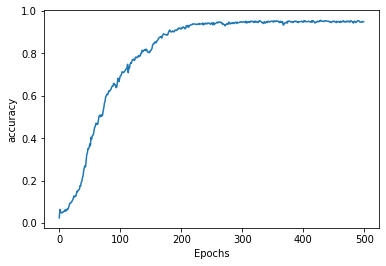

In [24]:
plot_graphs(history, 'accuracy')

In [31]:
seed_text = "Laurence went to dublin"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
            
    seed_text += " " + output_word

print(seed_text)

Laurence went to dublin in couples as groups groups fainted again a mchugh hall hall rose hearty hearty hearty hearty hearty hearty lanigan lanigan lanigan rose fainted relations relations round hearty hearty hearty hearty hearty hearty hearty hearty lanigan hearty hearty hearty hearty lanigan hearty hearty hearty hearty hearty lanigan hearty hearty hearty hearty lanigan hearty hearty hearty hearty hearty lanigan hearty hearty hearty hearty lanigan hearty hearty hearty hearty hearty lanigan hearty hearty hearty hearty lanigan hearty hearty hearty hearty hearty lanigan hearty hearty hearty hearty lanigan hearty hearty hearty hearty hearty lanigan hearty hearty hearty hearty lanigan hearty hearty hearty hearty hearty
